<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/tanimoto_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tratamiento de smiles con pandas***



In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url= "https://raw.githubusercontent.com/jisusP/Articulo/main/SMILES.csv"

sm=pd.read_csv(url)
sm

,#,smiles
0,1,CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1
1,2,ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1
2,3,FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1
3,4,C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1
4,5,CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1
5,6,ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1
6,7,ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1
7,8,FC1=CC=C2N=C(\C=C\C3=NC=CC=C3)C=CC2=C1
8,9,C(=C/C1=NC2=CC=CC=C2C=C1)\C1=CN=CC=C1
9,10,ClC1=CC=C2N=C(\C=C\C3=CN=CC=C3)C=CC2=C1


In [18]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 28.4 MB/s eta 0:00:00


In [50]:
#índices de tanimoto
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

smile_alone = sm.loc[:,"smiles"]
mkeys = []

def tanimoto(s):
  mol = Chem.MolFromSmiles(s)
  mkeys = MACCSkeys.GenMACCSKeys(mol)
  return mkeys

for i in smile_alone:
  
  mkeys.append(tanimoto(i))

sm = sm.assign(Mkeys=mkeys)
sm

,#,smiles,Mkeys
0,1,CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,6,ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,7,ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,8,FC1=CC=C2N=C(\C=C\C3=NC=CC=C3)C=CC2=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,9,C(=C/C1=NC2=CC=CC=C2C=C1)\C1=CN=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,10,ClC1=CC=C2N=C(\C=C\C3=CN=CC=C3)C=CC2=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
Tan=[]
for k in sm['Mkeys']:
  for i in sm['Mkeys']:
    Tan.append(DataStructs.FingerprintSimilarity(k,i, metric = DataStructs.TanimotoSimilarity))
    print(Tan)

#sm = sm.assign(Tanimoto = Tan)


In [78]:
x = 12
dividir_array= lambda Tan, x: [Tan[i:i+x] for i in range(0, len(Tan), x)]
data=dividir_array(Tan, x)
df_tan=pd.DataFrame(data)
df_tan.corr()


The Final List is: [[1.0, 0.64, 0.64, 0.8, 0.85, 0.6666666666666666, 0.6666666666666666, 0.6, 0.7142857142857143, 0.6, 0.7142857142857143, 0.6], [0.64, 1.0, 0.9090909090909091, 0.7619047619047619, 0.7272727272727273, 0.9523809523809523, 0.9523809523809523, 0.782608695652174, 0.6818181818181818, 0.8636363636363636, 0.6818181818181818, 0.8636363636363636], [0.64, 0.9090909090909091, 1.0, 0.7619047619047619, 0.7272727272727273, 0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.6818181818181818, 0.782608695652174, 0.6818181818181818, 0.782608695652174], [0.8, 0.7619047619047619, 0.7619047619047619, 1.0, 0.9411764705882353, 0.8, 0.8, 0.7142857142857143, 0.8823529411764706, 0.7142857142857143, 0.8823529411764706, 0.7142857142857143], [0.85, 0.7272727272727273, 0.7272727272727273, 0.9411764705882353, 1.0, 0.7619047619047619, 0.7619047619047619, 0.6818181818181818, 0.8333333333333334, 0.6818181818181818, 0.8333333333333334, 0.6818181818181818], [0.6666666666666666, 0.95238095238095

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,-0.661752,-0.643928,0.582110,0.776997,-0.665780,-0.665780,-0.918459,0.086843,-0.905853,0.086843,-0.905853
1,-0.661752,1.000000,0.846336,-0.492853,-0.579868,0.962098,0.962098,0.423671,-0.681435,0.627156,-0.681435,0.627156
2,-0.643928,0.846336,1.000000,-0.466041,-0.549755,0.738001,0.738001,0.526132,-0.659439,0.425565,-0.659439,0.425565
3,0.582110,-0.492853,-0.466041,1.000000,0.932523,-0.465486,-0.465486,-0.650247,0.546104,-0.661463,0.546104,-0.661463
4,0.776997,-0.579868,-0.549755,0.932523,1.000000,-0.560146,-0.560146,-0.795759,0.400636,-0.801202,0.400636,-0.801202
5,-0.665780,0.962098,0.738001,-0.465486,-0.560146,1.000000,1.000000,0.457736,-0.605432,0.714583,-0.605432,0.714583
6,-0.665780,0.962098,0.738001,-0.465486,-0.560146,1.000000,1.000000,0.457736,-0.605432,0.714583,-0.605432,0.714583
7,-0.918459,0.423671,0.526132,-0.650247,-0.795759,0.457736,0.457736,1.000000,-0.019608,0.841004,-0.019608,0.841004
8,0.086843,-0.681435,-0.659439,0.546104,0.400636,-0.605432,-0.605432,-0.019608,1.000000,-0.117893,1.000000,-0.117893
9,-0.905853,0.627156,0.425565,-0.661463,-0.801202,0.714583,0.714583,0.841004,-0.117893,1.000000,-0.117893,1.000000


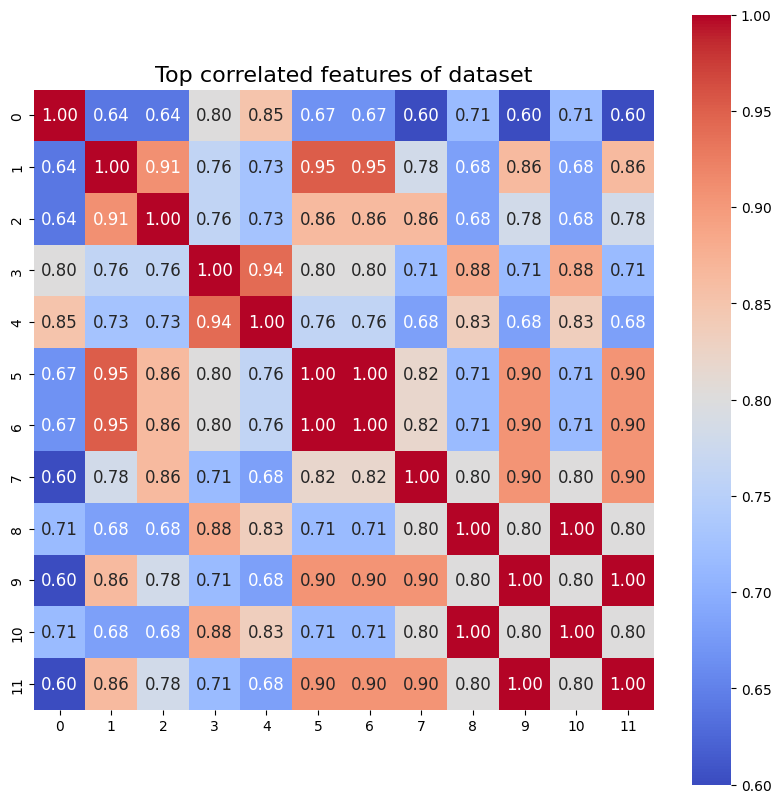

In [79]:
#Matriz heatMap de tanimoto

corr = df_tan.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_tan, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated Tanimoto of dataset', size=16)
plt.show()